# Radiohead Song Lyric Analysis
## Distribution of Word Length in Radiohead Songs

[lyrics.csv](lyrics.csv) is a csv file where each row is a Radiohead song, and there are columns for `album`, `artist`, `lyrics`, and `title`. To read it into Python, we will use `pandas`.

In [1]:
import pandas as pd
df = pd.read_csv("lyrics.csv", index_col=0)
df["lyrics"] = df["lyrics"].fillna("")  # Empty lyrics come up as NaN

We only want to work with the lyrics, so it would make sense to concatenate them all into a string. Also, it should be made lowercase, so that "The" and "the" are considered the same word. Also, we aren't concerned about punctuation, so we can get rid of that.

In [2]:
import string
lyrics = "\n".join(df["lyrics"])
lyrics = lyrics.lower()
lyrics = "".join(char for char in lyrics if char not in string.punctuation)  # THIS IS REALLY BAD

In natural language processing, splitting up a text into different parts is called "tokenization", and the parts are called "tokens". The `nltk` library has a nice way to tokenize by words: `nltk.word_tokenize`.

In [3]:
import nltk
word_tokens = nltk.word_tokenize(lyrics)

This returns a `list` of every word, but it would be easier to work with a `pandas.DataFrame`, like before.

In [4]:
words = pd.DataFrame(word_tokens, columns=["word"])

We can add another column to the `pandas.DataFrame` to get the length of a word.

In [5]:
words["length"] = words["word"].apply(len)

To plot this as a histogram, we can use `matplotlib.pyplot`.

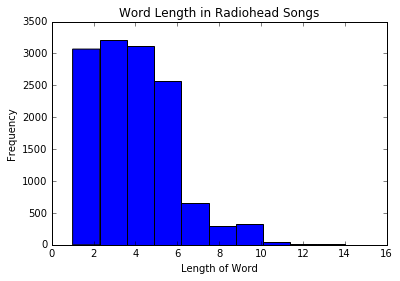

In [6]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.hist(words["length"])
plt.ylabel("Frequency")
plt.xlabel("Length of Word")
plt.title("Word Length in Radiohead Songs")
plt.show()

# TODO: Make analysis